In [1]:
import numpy as np

In [2]:
#평균 제곱 오차
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [3]:
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [4]:
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [5]:
mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [6]:
#교체 엔트로피 오차
def cross_entropy_error(y,t):
    #-무한대로 빠지는걸 방지하기위해 아주 작은값을 넣어줌
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

In [7]:
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [8]:
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [9]:
def function_1(x):
    return 0.01*x**2+0.1*x

In [10]:
numerical_diff(function_1,5)

0.1999999999990898

In [11]:
import matplotlib.pylab as plt

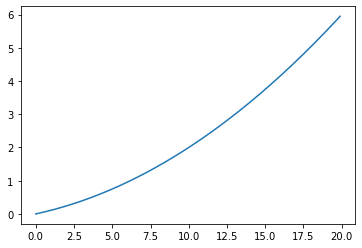

In [12]:
x=np.arange(0.0, 20.0, 0.1)
y=function_1(x)
plt.xlabel=('x')
plt.tlabel=('f(x)')
plt.plot(x,y)
plt.show()

In [13]:
numerical_diff(function_1,10)

0.2999999999986347

In [14]:
numerical_diff(function_1,15)

0.4000000000026205

In [15]:
def function_tmp1(x0):
    return x0*x0+(4)**2

In [16]:
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [17]:
def function_tmp2(x1):
    return (3)**2+x1*x1

In [18]:
numerical_diff(function_tmp2,4.0)

7.999999999999119

In [19]:
def function_2(x):
    return x[0]**2+x[1]**2

In [20]:
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x) #x의 shape를 받아서 0으로 초기화 시킴
    
    for idx in range(x.size):
        tmp_val = x[idx] #x[idx]=1.0
        #x+h와 해당하는 f 값
        x[idx]=tmp_val+h #x[idx]=1.0004
        fxh1=f(x) #f(x+h)
        # x-h와 해당하는 f 값
        x[idx]=tmp_val-h
        fxh2=f(x) #f(x-h)
        
        #최종 기울기 값(gradient)    
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val #값 복원
    return grad

In [21]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [22]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [23]:
numerical_gradient(function_2, np.array([2.0, 0.0]))

array([4., 0.])

In [27]:
def gradient_descent(f,init_x,lr=0.01, step_num=100):
    x=init_x #초기값 : 탐색을 시작하는 지점
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x=x-lr*grad # x-=lr*grad
        
    return x

In [28]:
init_x=np.array([-3.0, 4.0])

In [29]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])